In [5]:
pip list

Package                       Version
----------------------------- --------------------
absl-py                       2.1.0
aiohttp                       3.8.1
aiosignal                     1.2.0
alabaster                     0.7.12
anaconda-client               1.9.0
anaconda-navigator            2.1.4
anaconda-project              0.10.2
annotated-types               0.6.0
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.2
astor                         0.8.1
astroid                       2.6.6
astropy                       5.0.4
asttokens                     2.0.5
astunparse                    1.6.3
async-timeout                 4.0.1
atomicwrites                  1.4.0
attrs                         21.4.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.9.1
backcall                      0.2.0
backp

In [4]:
pip install tensorflow

     |████████████████████████████████| 589.8 MB 27 kB/s  eta 0:00:01
     |████████████████████████████████| 4.8 MB 2.9 MB/s eta 0:00:01
     |████████████████████████████████| 2.2 MB 4.2 MB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 4.3 MB/s eta 0:00:01
     |████████████████████████████████| 5.5 MB 3.5 MB/s eta 0:00:01
     |████████████████████████████████| 240 kB 1.7 MB/s eta 0:00:01
     |████████████████████████████████| 311 kB 1.3 MB/s eta 0:00:01
     |████████████████████████████████| 87 kB 945 kB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 3.6 MB/s eta 0:00:01
  Attempting uninstall: pygments
    Found existing installation: Pygments 2.11.2
    Uninstalling Pygments-2.11.2:
      Successfully uninstalled Pygments-2.11.2
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input # This will convert images from RGB to BGR, also note that this is a preprocessing so we need to use this before pass to the model.
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# Input: This is a Keras function that creates a placeholder for input data. It's typically used at the beginning of a Keras model to define the shape of the input data.
# Lambda: allows you to create custom layers or apply custom functions to the data flowing through your model. 
# Dense:  This is a standard fully connected layer in a neural network. Each neuron in a dense layer is connected to every neuron in the previous layer, and it applies a linear transformation followed by an activation function to the input data.
# Flatten:  This is another type of layer in Keras that's often used in convolutional neural networks (CNNs). It's used to convert multi-dimensional data (e.g., images represented as 2D arrays) into a one-dimensional array. 

In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]
BATCH_SIZE = 32

In [4]:
data_set = tf.keras.preprocessing.image_dataset_from_directory(
    "Skin Oiliness Dataset",
    shuffle = True,
    image_size = (IMAGE_SIZE),
    #images will be resized to 224x224 pixels.
    batch_size = BATCH_SIZE
    #group data into small chunks/batches before feeding it into model for training
    #makes the learning process smoother, more manageable, and often faster
)

Found 1334 files belonging to 4 classes.


2024-04-10 14:42:32.887865: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2024-04-10 14:42:32.889158: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-10 14:42:32.891388: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [5]:
# Extract the class name from the dataset
class_names = data_set.class_names
class_names

['Acne Skin', 'Dry Skin', 'Normal Skin', 'Oily Skin']

In [6]:
# This Function to display the first 10 images from a dataset
def display_first_10_images(data_set):
    # Creating a figure for the plot with specified size
    plt.figure(figsize=(10, 10))
    
    # Iterating over the dataset to extract images and labels
    for images, labels in data_set.take(1):  # Take the first batch of data
        # Looping through the first 10 images in the batch
        for i in range(10):
            # Adding subplots to the figure grid
            ax = plt.subplot(5, 5, i + 1)
            # Displaying the image, converting it to unsigned integer 8-bit format
            plt.imshow(images[i].numpy().astype("uint8"))
            # Adding title to the subplot indicating the class/label of the image
            plt.title(f'Class: {labels[i].numpy()}')
            # Turning off the axis for cleaner visualization
            plt.axis("off")



2024-04-10 14:42:37.343223: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2024-04-10 14:42:37.344658: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3194155000 Hz


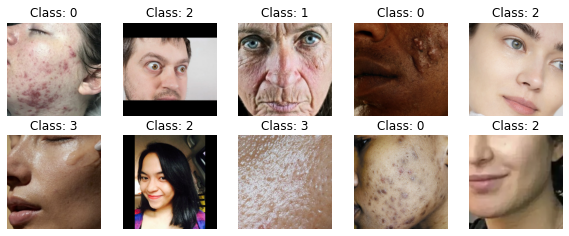

In [7]:

# Calling the function to display the first 10 images
display_first_10_images(data_set)

# Displaying the plot
plt.show()

In [8]:
def get_dataset_partitions_tf(ds, train_split=0.8, validation_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    """
    Splits dataset into training, validation, and test partitions.

    Parameters:
    - ds: TensorFlow dataset to be partitioned.
    - train_split: we allocate 80% from our dataset for training.
    - validation_split: we allocate 10% from our dataset for training.
    - test_split: we allocate 10% from our dataset for testing.
    - shuffle: Whether to shuffle the dataset (default is True).
    - shuffle_size: Size of the shuffle buffer (default is 10000).

    Returns:
    - train_ds: for training.
    - validation_ds: for validation.
    - test_ds: for testing.
    """
    # Get the total size of the dataset
    ds_size = len(ds)

    # Shuffle the dataset if specified
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)  # Shuffle with a specified seed

    # Calculate the sizes of training, validation, and test sets
    train_size = int(train_split * ds_size)
    validation_size = int(validation_split * ds_size)

    # Take the required number of samples for training
    train_ds = ds.take(train_size)

    # Skip the samples already taken for training and take samples for validation
    validation_ds = ds.skip(train_size).take(validation_size)

    # Skip the samples taken for both training and validation to get the test set
    test_ds = ds.skip(train_size).skip(validation_size)

    # Return the partitioned datasets
    return train_ds, validation_ds, test_ds


In [9]:
train_ds, validation_ds, test_ds = get_dataset_partitions_tf(data_set)

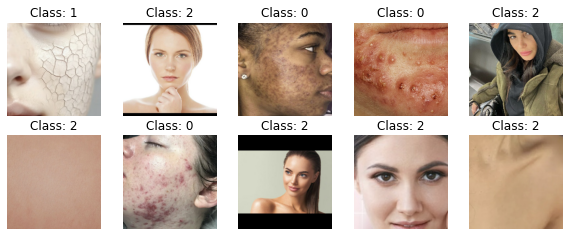

In [10]:
display_first_10_images(train_ds)

In [12]:
import os
import shutil

# Define a function to save the dataset to disk
def save_dataset_to_disk(dataset, directory, class_names):
    for i, (image, label) in enumerate(dataset):
        for j in range(len(image)):
            # Get the class name corresponding to the label
            class_name = class_names[label[j].numpy()]
            # Create class directories if not exist
            class_directory = os.path.join(directory, class_name)
            os.makedirs(class_directory, exist_ok=True)
            # Save images to class directories
            filename = os.path.join(class_directory, f"image_{i * 32 + j}.jpg")
            tf.keras.preprocessing.image.save_img(filename, image[j].numpy())



In [14]:
save_dataset_to_disk(train_ds, 'Splitted Data/Train')

In [13]:
save_dataset_to_disk(test_ds, 'Splitted Data/Test')

In [15]:
save_dataset_to_disk(validation_ds, 'Splitted Data/Validation')

In [21]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
# Image net is very large database of images

In [23]:
# don't train existing weights
for layer in vgg.layers:
    layer.trainable = False

In [24]:
folders = glob('Skin Oiliness Dataset/*')

In [25]:
len(folders)

4

In [26]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [27]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [28]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [32]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)
es=EarlyStopping(monitor='val_acc',mode='auto',verbose=1,baseline=.90,patience=0)


In [33]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [35]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [36]:
validation_datagen = ImageDataGenerator(rescale = 1./255)

In [41]:
training_set = train_datagen.flow_from_directory(
    'Splitted Data/Train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 1818 images belonging to 4 classes.


In [42]:
testing_set = train_datagen.flow_from_directory(
    'Splitted Data/Test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 272 images belonging to 4 classes.


In [43]:
validation_set = train_datagen.flow_from_directory(
    'Splitted Data/Validation',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 219 images belonging to 4 classes.


In [44]:
# training_set = training_set.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
# validation_set = validation_set.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
# testing_set = testing_set.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)


In [45]:
import scipy.ndimage

In [46]:
history = model.fit(
    training_set,
    validation_data=validation_set,  # Include the validation set here
    epochs=30,
    steps_per_epoch=len(training_set),
    validation_steps=len(validation_set)
    
)

Epoch 1/30
57/57 [==============================] - 110s 2s/step - loss: 1.2103 - accuracy: 0.5585 - val_loss: 0.4755 - val_accuracy: 0.8402
Epoch 2/30
57/57 [==============================] - 108s 2s/step - loss: 0.4511 - accuracy: 0.8469 - val_loss: 0.4291 - val_accuracy: 0.8402
Epoch 3/30
57/57 [==============================] - 109s 2s/step - loss: 0.3680 - accuracy: 0.8722 - val_loss: 0.2991 - val_accuracy: 0.8904
Epoch 4/30
57/57 [==============================] - 120s 2s/step - loss: 0.2821 - accuracy: 0.9009 - val_loss: 0.2318 - val_accuracy: 0.9361
Epoch 5/30
57/57 [==============================] - 121s 2s/step - loss: 0.2429 - accuracy: 0.9154 - val_loss: 0.2062 - val_accuracy: 0.9498
Epoch 6/30
57/57 [==============================] - 121s 2s/step - loss: 0.1860 - accuracy: 0.9445 - val_loss: 0.2121 - val_accuracy: 0.9315
Epoch 7/30
57/57 [==============================] - 119s 2s/step - loss: 0.1716 - accuracy: 0.9534 - val_loss: 0.2115 - val_accuracy: 0.9269
Epoch 8/30
57

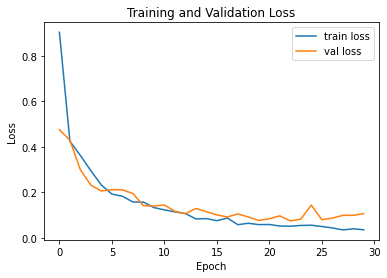

In [47]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.savefig('LossVal_loss')  # Save the plot
plt.show()  # Display the plot

In [66]:
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

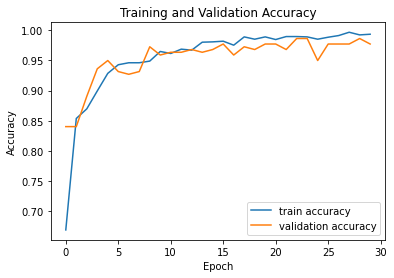

In [48]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.savefig('AccVal_acc')  # Save the plot
plt.show()  # Display the plot

first image to predict
actual label: Dry Skin
predicted label: Dry Skin


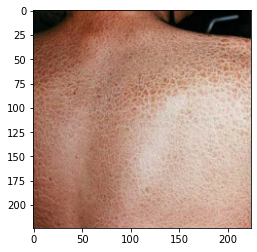

In [49]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0] .numpy()
    
    print("first image to predict")
    plt. imshow(first_image)
    print("actual label:", class_names [first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:" ,class_names[np.argmax(batch_prediction[0])])

In [50]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array (images[i].numpy())
    img_array = tf. expand_dims(img_array, 0) # Create a batch
    
    predictions = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions [0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

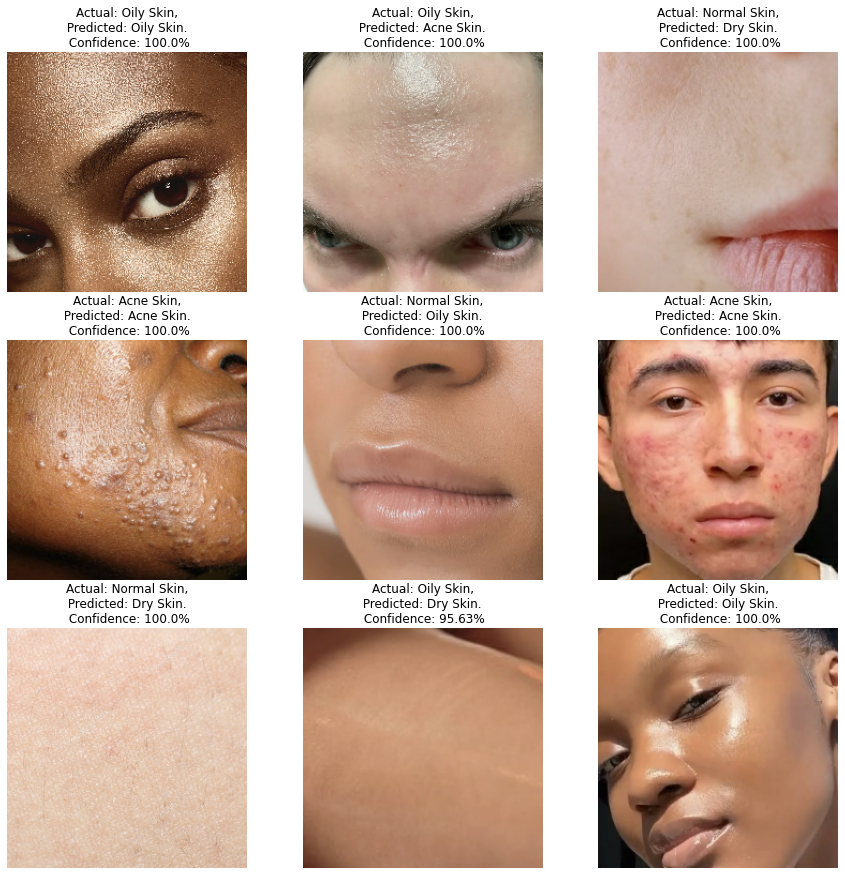

In [51]:
plt.figure(figsize=(15, 15))

for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())  
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}. \n Confidence: {confidence}%")  
        plt.axis("off")

In [52]:

model.save("Models/model_VGG_epochs_V 2.0.keras")

In [53]:
model.save("Models/model_VGG_epochs_V 2.0")

2024-04-10 02:03:07.405075: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: Models/model_VGG_epochs_V 2.0/assets


In [54]:
model.save("Models/model_VGG_epochs_V 2.0.h5")

In [55]:
model.save("Models/model_VGG_epochs_V 2.0.pb")

INFO:tensorflow:Assets written to: Models/model_VGG_epochs_V 2.0.pb/assets


In [ ]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('Models/model_VGG_epochs_50')

# Load the face detection model
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Access the webcam
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Convert frame to grayscale for face detection
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces in the grayscale frame
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

    for (x, y, w, h) in faces:
        # Extract face ROI
        face_roi = frame[y:y+h, x:x+w]

        # Resize the face ROI to match the input size expected by your model (224x224)
        resized_face = cv2.resize(face_roi, (224, 224))

        # Preprocess the resized face ROI (normalize, etc.)
        # You need to preprocess the face ROI in the same way you preprocessed your training data

        # Make predictions
        prediction = model.predict(np.expand_dims(resized_face, axis=0))
        oiliness_level = np.argmax(prediction)  # Assuming your model outputs class probabilities
        print(oiliness_level)

        # Display the oiliness level
        cv2.putText(frame, f'Oiliness: {oiliness_level}', (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

        # Draw a rectangle around the detected face
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)

    # Display the webcam feed
    cv2.imshow('Webcam Feed', frame)

    # Break the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the webcam and close all OpenCV windows
cap.release()
cv2.destroyAllWindows()


In [2]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

def open_camera():

    # Load the trained model
    model = tf.keras.models.load_model("Models/model_VGG_epochs_30.keras")
    # Load the face detection model
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    # Define class labels (replace with your actual class labels)
    class_labels = ['Acne', 'Dry', 'Normal', 'Oily']

    # Access the webcam
    cap = cv2.VideoCapture(0)

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        # Convert frame to grayscale for face detection
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Detect faces in the grayscale frame
        faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

        for (x, y, w, h) in faces:
            # Extract face ROI
            face_roi = frame[y:y+h, x:x+w]

            # Resize the face ROI to match the input size expected by your model (224x224)
            resized_face = cv2.resize(face_roi, (224, 224))

            # Preprocess the resized face ROI (normalize, etc.)
            # You need to preprocess the face ROI in the same way you preprocessed your training data

            # Make predictions
            prediction = model.predict(np.expand_dims(resized_face, axis=0))
            predicted_class_index = np.argmax(prediction)  # Get the index of the predicted class

            # Get the predicted class label
            predicted_class_label = class_labels[predicted_class_index]

            # Display the predicted class label around the detected face
            cv2.putText(frame, f'{predicted_class_label}', (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

            # Draw a rectangle around the detected face
            cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)

        # Display the webcam feed
        cv2.imshow('Webcam Feed', frame)

        # Break the loop if 'q' is pressed
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # Release the webcam and close all OpenCV windows
    cap.release()
    cv2.destroyAllWindows()


In [ ]:
open_camera()

In [3]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

def open_mobile_camera():
    # Load the trained model
    model = tf.keras.models.load_model("Models/model_VGG_epochs_30.keras")

    # Load the face detection model
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    # Define class labels (replace with your actual class labels)
    class_labels = ['Acne', 'Dry', 'Normal', 'Oily']

    # Access the phone camera stream (replace the URL with your phone's camera stream URL)
    url = "http://192.168.19.112:8080/video"
    cap = cv2.VideoCapture(url)

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        # Convert frame to grayscale for face detection
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Detect faces in the grayscale frame
        faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

        for (x, y, w, h) in faces:
            # Extract face ROI
            face_roi = frame[y:y+h, x:x+w]

            # Resize the face ROI to match the input size expected by your model (224x224)
            resized_face = cv2.resize(face_roi, (224, 224))

            # Preprocess the resized face ROI (normalize, etc.)
            # You need to preprocess the face ROI in the same way you preprocessed your training data

            # Make predictions
            prediction = model.predict(np.expand_dims(resized_face, axis=0))
            oiliness_level = np.argmax(prediction)  # Assuming your model outputs class probabilities

            # Get the corresponding class label
            oiliness_label = class_labels[oiliness_level]

            # Display the oiliness level
            cv2.putText(frame, f'Oiliness: {oiliness_label}', (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

            # Draw a rectangle around the detected face
            cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)

        # Display the camera feed
        cv2.imshow('Phone Camera Feed', frame)

        # Break the loop if 'q' is pressed
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # Release the camera and close all OpenCV windows
    cap.release()
    cv2.destroyAllWindows()


In [14]:
open_mobile_camera()

1/1 [==============================] - 0s 78ms/step


In [1]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
import tensorflow  as tf

def process_single_image(image_path):
    # Load the trained model
    MODEL = tf.keras.models.load_model("Models/model_VGG_epochs_30.keras")
    # Load the face detection model
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    # Define class labels (replace with your actual class labels)
    class_labels = ['Acne', 'Dry', 'Normal', 'Oily']

    # Read the image
    img = cv2.imread(image_path)

    # Convert image to grayscale for face detection
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Detect faces in the grayscale frame
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

    for (x, y, w, h) in faces:
        # Extract face ROI
        face_roi = img[y:y+h, x:x+w]

        # Resize the face ROI to match the input size expected by your model (224x224)
        resized_face = cv2.resize(face_roi, (224, 224))

        # Preprocess the resized face ROI (normalize, etc.)
        # You need to preprocess the face ROI in the same way you preprocessed your training data

        # Make predictions
        print(np.expand_dims(resized_face, axis=0))
        prediction = model.predict(np.expand_dims(resized_face, axis=0))
        
        # Get the index of the highest probability
        predicted_class_index = np.argmax(prediction)
        
        # Get the corresponding class label
        predicted_class_label = class_labels[predicted_class_index]

        # Display the predicted class label around the detected face
        cv2.putText(img, f'{predicted_class_label}', (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

        # Draw a circle around the detected face
        center = (x + w // 2, y + h // 2)
        radius = min(w, h) // 2
        cv2.circle(img, center, radius, (255, 0, 0), 2)

    # Display the processed image
    cv2.imshow('Processed Image', img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [ ]:
path = "Splitted Data/Validation/Normal Skin/image_10.jpg"
process_single_image(path)

[[[[ 36  48  82]
   [ 36  48  82]
   [ 37  49  84]
   ...
   [ 63  81 122]
   [ 62  80 121]
   [ 62  80 121]]

  [[ 36  48  82]
   [ 36  48  82]
   [ 37  50  84]
   ...
   [ 63  81 122]
   [ 62  80 121]
   [ 62  80 121]]

  [[ 35  47  81]
   [ 35  47  81]
   [ 36  48  83]
   ...
   [ 62  81 122]
   [ 62  80 121]
   [ 62  80 121]]

  ...

  [[ 16  13  15]
   [ 16  13  15]
   [ 16  13  15]
   ...
   [ 21  20  22]
   [ 21  20  22]
   [ 21  20  22]]

  [[ 16  13  15]
   [ 16  13  15]
   [ 16  13  15]
   ...
   [ 21  20  22]
   [ 21  20  22]
   [ 21  20  22]]

  [[ 16  13  15]
   [ 16  13  15]
   [ 16  13  15]
   ...
   [ 21  20  22]
   [ 21  20  22]
   [ 21  20  22]]]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step
[[[[36 50 73]
   [36 50 73]
   [36 50 73]
   ...
   [32 43 70]
   [31 42 69]
   [31 42 69]]

  [[36 50 73]
   [36 50 73]
   [36 50 73]
   ...
   [32 43 70]
   [31 42 69]
   [31 42 69]]

  [[36 50 73]
   [36 50 73]
   [36 50 73]
   ...
   [32 43 70]
   [31 42 69]
   [31 42 69]]

  ...

 

QObject::moveToThread: Current thread (0x640984e5b530) is not the object's thread (0x6409872ea710).
Cannot move to target thread (0x640984e5b530)

QObject::moveToThread: Current thread (0x640984e5b530) is not the object's thread (0x6409872ea710).
Cannot move to target thread (0x640984e5b530)

QObject::moveToThread: Current thread (0x640984e5b530) is not the object's thread (0x6409872ea710).
Cannot move to target thread (0x640984e5b530)

QObject::moveToThread: Current thread (0x640984e5b530) is not the object's thread (0x6409872ea710).
Cannot move to target thread (0x640984e5b530)

QObject::moveToThread: Current thread (0x640984e5b530) is not the object's thread (0x6409872ea710).
Cannot move to target thread (0x640984e5b530)

QObject::moveToThread: Current thread (0x640984e5b530) is not the object's thread (0x6409872ea710).
Cannot move to target thread (0x640984e5b530)

QObject::moveToThread: Current thread (0x640984e5b530) is not the object's thread (0x6409872ea710).
Cannot move to tar

In [ ]:
MODEL = tf.keras.models.load_model("Models/model_VGG_epochs_30.keras")